# U.S. Medical Insurance Costs Michael Babczyk
In this project, I will investigate a csv file with medical insurance costs using Python fundamentals. It is my hope that with this project I will analyze various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.



For start im going to import the libraries that i will use.
and read the file and maintain each column in a list

In [30]:
# Import csv
import csv
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Opening the insurance file and convert it to a dictionary
with open("insurance.csv") as insurance_csv:
    dict_insurance = csv.DictReader(insurance_csv)
    # Convert every key to a list
    age_list = []
    sex_list = []
    bmi_list = []
    num_of_children_list = []
    smoker_list = []
    region_list = []
    charges_list = []
    for row in dict_insurance:
        age_list.append(int(row["age"]))
        # Making the sex a binary list (female = 0, male = 1)
        if row["sex"] == "female":
            sex_list.append(0)
        else:
            sex_list.append(1)
        bmi_list.append(float(row["bmi"]))
        num_of_children_list.append(int(row["children"]))
        # Also making the smoker statuses a binary list
        if row["smoker"] == "yes":
            smoker_list.append(1)
        else:
            smoker_list.append(0)
        region_list.append(row["region"])
        charges_list.append(float(row["charges"]))
        

### making a class
Now i am going to making a class that will contain all the function that ill use

In [32]:
# Making a class of all the data and calculaitions method
class PatientsInfo:
    # init method that takes in each list parameter
    def __init__(self, age_list, bmi_list, charges_list, num_of_children_list, sex_list, region_list, smoker_list):
        self.patients_ages = age_list
        self.patients_bmis = bmi_list
        self.patients_charges = charges_list
        self.patients_num_children = num_of_children_list
        self.patients_sex = sex_list
        self.patients_regions = region_list
        self.patients_smoker_statuses = smoker_list
        
     # This method returns the average from a list
    def get_avg(self, lst):
        counter = 0
        total = len(lst)
        for i in lst:
            counter += i
        return counter / total
    
    # This method returns the median from a list
    def get_median(self, lst):
        lst.sort()
        if len(lst) % 2 != 0:
            middle_index = int((len(lst) - 1) / 2)
            return lst[middle_index]
        else:
            middle_index_1 = int(len(lst) / 2)
            middle_index_2 = int((len(lst)-1) / 2)
            return (lst[middle_index_1] + lst[middle_index_2]) / 2
    
    # This method returns the mode from a list
    def get_mode(self, lst):
        max_count = (0, 0)
        for num in lst:
            occurences = lst.count(num)
            if occurences > max_count[0]:
                max_count = (occurences, num)
        return max_count[1]

In [33]:
# Saving the class in a instance variable
patientsinfo = PatientsInfo(age_list, bmi_list, charges_list, num_of_children_list, sex_list, region_list, smoker_list)

### looking for average, median and mode charges


The average insurance charge is $13270.422265141257, the median insurance charge is $9382.033, and the mode insurance charge is $1639.5631


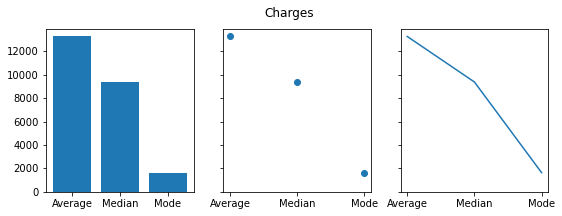

In [34]:
#Saving the average charge in a variable
avg_charges = patientsinfo.get_avg(patientsinfo.patients_charges)
# Saving the median in a varrible
median_charges = patientsinfo.get_median(patientsinfo.patients_charges)
# Saving the mode charge in a varible
mode_charges = patientsinfo.get_mode(patientsinfo.patients_charges)

# Creating a dictoinary using names as a key and variables as values
data = {'Average': avg_charges, 'Median': median_charges, 'Mode': mode_charges}
# Convert the dict to two lists that i will use in a format
names = list(data.keys())
values = list(data.values())

# Using plt format to visualize the result
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Charges')

print("The average insurance charge is ${}, the median insurance charge is ${}, and the mode insurance charge is ${}".format(avg_charges, median_charges, mode_charges))

We can see from the result that there is a huge differance between the average and the mode charge.
from this result i can understand that there is some factor that make the insurance charge much more expensive.

now im going to check three things:
1. What is the average age and the mode age
2. What is the average bmi and the mode bmi
3. If there are more smokers patients or more no smokers

In [35]:
# Saving the average age in a variable
avg_age = patientsinfo.get_avg(patientsinfo.patients_ages)
# Saving the mode age in a variable
mode_age = patientsinfo.get_mode(patientsinfo.patients_ages)
# Saving the average BMI in a variable
avg_bmi = patientsinfo.get_avg(patientsinfo.patients_bmis)
# Saving the mode BMI in a variable
mode_bmi = patientsinfo.get_mode(patientsinfo.patients_bmis)
# Saving the mode smoker or not in a varible
mode_smoker_status = patientsinfo.get_mode(patientsinfo.patients_smoker_statuses)

# Making am if statement so that insted seeing in the output a number, we will see a string
if mode_smoker_status == 0:
    mode_smoker_status = "there are more non smokers patients"
else:
    mode_smoker_status = "there are more smokers patients"
    
print("The average age is {:.2f}, the mode age is {:.2f}, the average BMI is {:.2f}, the mode BMI is {:.2f}, and {}".format(avg_age, mode_age, avg_bmi, mode_bmi, mode_smoker_status))

The average age is 39.21, the mode age is 18.00, the average BMI is 30.66, the mode BMI is 32.30, and there are more non smokers patients


From a quick look at the result we might get to a conclusion that the most expensive factor its the BMI scale, but in a second glanced we see that this result are arbitrory and tell us nothing about the price factor.

### looking for the most expensive factor
wer'e need to do some more analesys! now im going to create a two dimensional list that contains all the data per indevidual. and then im going to search for the most expensive factor

In [36]:
# Create a list of all patients information per patient
all_info_per_patient = list(zip(patientsinfo.patients_ages, patientsinfo.patients_sex, patientsinfo.patients_bmis, patientsinfo.patients_num_children, patientsinfo.patients_smoker_statuses, patientsinfo.patients_regions, patientsinfo.patients_charges))
 
# Iterate thru every index to create a new list of patients that have a good factors except bmi.
bmi_factor_charge = []
for i in all_info_per_patient:
    # Create an if statement that will append to the bad_bmi list patients with the maximum age of 30, non smokers, with no children, and bad bmi (not between 18-30 )
    if i[0] <= 30 and i[3] == 0 and i[4] == 0 and i[2] >= 30 or i[2] < 18:
        #we will need only the last index (the charges index)
        bmi_factor_charge.append(i[-1])
        
# Now the same but now the bmi is going to be between 18-30, and there are going to be smokers. that wil check the smokers status factor
smoker_status_factor_charge = []
for i in all_info_per_patient:
    # same if statemant as before except now the patients are going to be smokers and with proper bmi
    if i[0] <= 30 and i[3] == 0 and i[4] == 1 and i[2] < 30 and i[2] > 18:
        smoker_status_factor_charge.append(i[-1])
        
# Now again last time with the age factor
age_factor_charge = []
for i in all_info_per_patient:
    # Same if statemant as before except now the patients are going to be smokers and with proper bmi
    if i[0] >= 30 and i[3] == 0 and i[4] == 0 and i[2] < 30 and i[2] > 18:
        age_factor_charge.append(i[-1])

now we have the lists with simular factors that one factor of them is making their insurance more expensive.

now we will see the difference betweens thier average, median and mode charges.

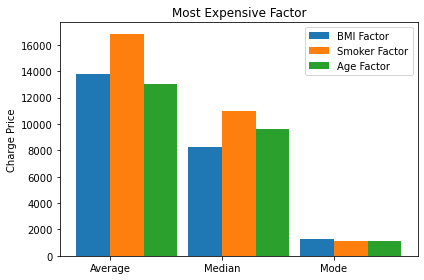

The average charge of the BMI factor is $13780.19, The average charge of the smoker status factor is $16867.45, The average charge of the age factor is $13070.88
 
The median charge of the BMI factor is $8269.62, The median charge of the smoker status factor is $11015.17, The median charge of the age factor is $9583.89
 
The mode charge of the BMI factor is $1242.82, The mode charge of the smoker status factor is $1121.87, The mode charge of the age factor is $1136.40


In [67]:
# Saving the average charge of the BMI factor in variable
bmi_factor_charge_avg = patientsinfo.get_avg(bmi_factor_charge)
# Saving the median charge of the BMI factor in variable
bmi_factor_charge_median = patientsinfo.get_median(bmi_factor_charge)
# Saving the mode charge of the BMI factor in variable
bmi_factor_charge_mode = patientsinfo.get_mode(bmi_factor_charge)

# Saving the average charge of the smoker status factor in variable
smoker_status_factor_charge_avg = patientsinfo.get_avg(smoker_status_factor_charge)
# Saving the median charge of the smoker status factor in variable
smoker_status_factor_charge_median = patientsinfo.get_median(smoker_status_factor_charge)
# Saving the mode charge of the smoker status factor in variable
smoker_status_factor_charge_mode = patientsinfo.get_mode(smoker_status_factor_charge)

# Saving the average charge of the age factor in variable
age_factor_charge_avg = patientsinfo.get_avg(age_factor_charge)
# Saving the median charge of the age factor in variable
age_factor_charge_median = patientsinfo.get_median(age_factor_charge)
# Saving the mode charge of the age factor in variable
age_factor_charge_mode = patientsinfo.get_mode(age_factor_charge)


# As before im going to make lists to visualize the data
labels = ['Average', 'Median', 'Mode']
bmi_factor_plot = [bmi_factor_charge_avg, bmi_factor_charge_median, bmi_factor_charge_mode]
smoker_status_factor_plot = [smoker_status_factor_charge_avg, smoker_status_factor_charge_median, smoker_status_factor_charge_mode]
age_factor_plot = [age_factor_charge_avg, age_factor_charge_median, age_factor_charge_mode]

x = np.arange(len(labels))  # The label locations
width = 0.3  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bmi_factor_plot, width, label='BMI Factor')
rects2 = ax.bar(x + width/2, smoker_status_factor_plot, width, label='Smoker Factor')
rects3 = ax.bar(x + width/0.664, age_factor_plot, width, label='Age Factor')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Charge Price')
ax.set_title('Most Expensive Factor')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


print("The average charge of the BMI factor is ${:.2f}, The average charge of the smoker status factor is ${:.2f}, The average charge of the age factor is ${:.2f}".format(bmi_factor_charge_avg, smoker_status_factor_charge_avg, age_factor_charge_avg))
print(" ")
print("The median charge of the BMI factor is ${:.2f}, The median charge of the smoker status factor is ${:.2f}, The median charge of the age factor is ${:.2f}".format(bmi_factor_charge_median, smoker_status_factor_charge_median, age_factor_charge_median))
print(" ")
print("The mode charge of the BMI factor is ${:.2f}, The mode charge of the smoker status factor is ${:.2f}, The mode charge of the age factor is ${:.2f}".format(bmi_factor_charge_mode, smoker_status_factor_charge_mode, age_factor_charge_mode))


This result are much more satisfying, we can see that the average chrage for smokers is much more bigger then the others factor, and also the median charge for smokers.
Now i can say from this result that if someone want to cut expenses from the insurance yearly charge, he better not smoking.
because that the major factor for the high price of the insurance yearly charge.

### Looking For The Gender Factor
now im going to check if their is a differance between charges of males and charges of females

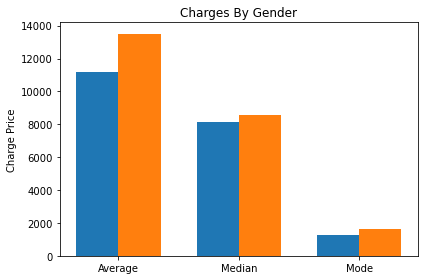

The average charge of healthy young males is $11177.37, The average charge of healthy young females is $13519.93
 
The median charge of healthy young males is $8143.69, The median charge of healthy young females is $8572.19
 
The mode charge of healthy young males is $1241.57, The mode charge of healthy young females is $1628.47


In [58]:
# For that ill need to create to lists that each list will contains an healthy patients but one list is going to be females and the other are going to be males

# Create an empty lists
male_factor_charges = []
female_factor_charges = []

# Iterate thrugh every index in all_info_per_patient to create a new list of patients that have a good factors except one list will be males and the oter females.
for i in all_info_per_patient:
    # Create an if statement that will append to the male_factor_list male patients with the maximum age of 30, non smokers, with no children, and good bmi (between 18-30)
    if i[0] <= 30 and i[3] == 0 and i[4] == 0 and i[2] < 30 and i[2] > 18 and i[1] == 1:
        male_factor_charges.append(i[-1])
    # Create an elif statement that will append to the female_factor_list female patients with the maximum age of 30, non smokers, with no children, and good bmi (between 18-30)
    elif i[0] <= 30 and i[3] == 0 and i[4] == 0 and i[2] < 30 and i[2] > 18 and i[1] == 0:
        female_factor_charges.append(i[-1])
        
        
# Now im going to save the average, median, and mode of each list in varriables
# Saving male factor average charge
male_factor_charges_avg = patientsinfo.get_avg(male_factor_charges)
# Saving male factor median charge
male_factor_charges_median = patientsinfo.get_median(male_factor_charges)
# Saving male factor mode charge
male_factor_charges_mode = patientsinfo.get_mode(male_factor_charges)

# Saving female factor average charge
female_factor_charges_avg = patientsinfo.get_avg(female_factor_charges)
# Saving female factor median charge
female_factor_charges_median = patientsinfo.get_median(female_factor_charges)
# Saving female factor mode charge
female_factor_charges_mode = patientsinfo.get_mode(female_factor_charges)

# As before im going to make lists to visualize the data
labels = ['Average', 'Median', 'Mode']
male_charges = [male_factor_charges_avg, male_factor_charges_median, male_factor_charges_mode]
female_charges = [female_factor_charges_avg, female_factor_charges_median, female_factor_charges_mode]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_charges, width, label='Male')
rects2 = ax.bar(x + width/2, female_charges, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Charge Price')
ax.set_title('Charges By Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)


fig.tight_layout()

plt.show()

print("The average charge of healthy young males is ${:.2f}, The average charge of healthy young females is ${:.2f}".format(male_factor_charges_avg, female_factor_charges_avg))
print(" ")
print("The median charge of healthy young males is ${:.2f}, The median charge of healthy young females is ${:.2f}".format(male_factor_charges_median, female_factor_charges_median))
print(" ")
print("The mode charge of healthy young males is ${:.2f}, The mode charge of healthy young females is ${:.2f}".format(male_factor_charges_mode, female_factor_charges_mode))


We can learn from this result that on average females insurances are more expensive. 
And it is play as a factor for the price

### checking if the gender factor affect the most expensive factor
for this im going to take the same code from above that check the most expensive factor and see if i only choose male or female
how it will change the most expensive factor

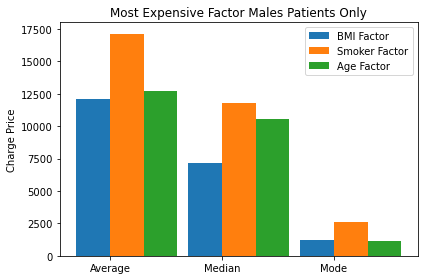

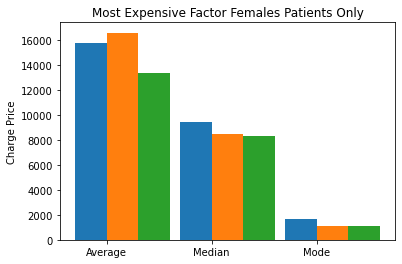

The average charge for males bmi factor is $12084.98, The average charge for males smoker status factor is $17145.93, The average charge for males age factor is $12681.48
 
The average charge for females bmi factor is $15807.79, The average charge for females smoker status factor is $16610.40, The average charge for females age factor is $13357.53
 
 
The median charge for males bmi factor is $7153.55, The median charge for males smoker status factor is $11788.79, The median charge for males age factor is $10579.71
 
The median charge for females bmi factor is $9411.00, The median charge for females smoker status factor is $8457.82, The median charge for females age factor is $8360.09
 
 
The mode charge for males bmi factor is $1242.82, The mode charge for males smoker status factor is $2597.78, The mode charge for males age factor is $1136.40
 
The mode charge for females bmi factor is $1694.80, The mode charge for females smoker status factor is $1121.87, The mode charge for females

In [97]:
# Taking the code from earliar and change it a bit
# making two empty lists that each one will contains the bmi factor and only one gender (male or female)
bmi_factor_list_males = []
bmi_factor_list_females = []
for i in all_info_per_patient:
    # Create an if statement that will append to the bad_bmi list males patients with the maximum age of 30, non smokers, with no children, and bad bmi (not between 18-30 )
    if i[1] == 1 and i[0] <= 30 and i[3] == 0 and i[4] == 0 and i[2] >= 30 or i[2] < 18:
        bmi_factor_list_males.append(i[-1])
    # Making an elif statement that does the same but append females to bmi_factor_list_females
    elif i[1] == 0 and i[0] <= 30 and i[3] == 0 and i[4] == 0 and i[2] >= 30 or i[2] < 18:
        bmi_factor_list_females.append(i[-1])
# Now the same but with smoker factor
smokers_factor_list_male = []
smokers_factor_list_female = []
for i in all_info_per_patient:
    if i[1] == 1 and i[0] <= 30 and i[3] == 0 and i[4] == 1 and i[2] < 30 and i[2] > 18:
        smokers_factor_list_male.append(i[-1])
    elif i[1] == 0 and i[0] <= 30 and i[3] == 0 and i[4] == 1 and i[2] < 30 and i[2] > 18:
        smokers_factor_list_female.append(i[-1])
        
# Now again last time with the age factor
age_factor_list_male = []
age_factor_list_female = []
for i in all_info_per_patient:
    if i[1] == 1 and i[0] >= 30 and i[3] == 0 and i[4] == 0 and i[2] < 30 and i[2] > 18:
        age_factor_list_male.append(i[-1])
    elif i[1] == 0 and i[0] >= 30 and i[3] == 0 and i[4] == 0 and i[2] < 30 and i[2] > 18:
        age_factor_list_female.append(i[-1])
        

# Now im going to save the average, median, and mode of each list in variables
# Saving the average chrage of the bmi males factor in variable
bmi_factor_avg_males = patientsinfo.get_avg(bmi_factor_list_males)
# Saving the average chrage of the bmi females factor in variable
bmi_factor_avg_females = patientsinfo.get_avg(bmi_factor_list_females)
# Saving the median chrage of the bmi males factor in variable
bmi_factor_median_males = patientsinfo.get_median(bmi_factor_list_males)
# Saving the median chrage of the bmi females factor in variable
bmi_factor_median_females = patientsinfo.get_median(bmi_factor_list_females)
# Saving the mode chrage of the bmi males factor in variable
bmi_factor_mode_males = patientsinfo.get_mode(bmi_factor_list_males)
# Saving the mode chrage of the bmi females factor in variable
bmi_factor_mode_females = patientsinfo.get_mode(bmi_factor_list_females)

# Saving the average chrage of the smoker status males factor in variable
smokers_factor_avg_males = patientsinfo.get_avg(smokers_factor_list_male)
# Saving the average chrage of the smoker status females factor in variable
smokers_factor_avg_females = patientsinfo.get_avg(smokers_factor_list_female)
# Saving the median chrage of the smoker status males factor in varriables
smokers_factor_median_males = patientsinfo.get_median(smokers_factor_list_male)
# Saving the median chrage of the smoker status females factor in variable
smokers_factor_median_females = patientsinfo.get_median(smokers_factor_list_female)
# Saving the mode chrage of the smoker status males factor in variable
smokers_factor_mode_males = patientsinfo.get_mode(smokers_factor_list_male)
# Saving the mode chrage of the smoker status females factor in variable
smokers_factor_mode_females = patientsinfo.get_mode(smokers_factor_list_female)

# Saving the average chrage of the age males factor in variable
age_factor_avg_males = patientsinfo.get_avg(age_factor_list_male)
# Saving the average chrage of the age females factor in variable
age_factor_avg_females = patientsinfo.get_avg(age_factor_list_female)
# Saving the mdeian chrage of the age males factor in variable
age_factor_median_males = patientsinfo.get_median(age_factor_list_male)
# Saving the mdeian chrage of the age females factor in variable
age_factor_median_females = patientsinfo.get_median(age_factor_list_female)
# Saving the mode chrage of the age males factor in variable
age_factor_mode_males = patientsinfo.get_mode(age_factor_list_male)
# Saving the mode chrage of the age females factor in variable
age_factor_mode_females = patientsinfo.get_mode(age_factor_list_female)


labels = ['Average', 'Median', 'Mode']
bmi_factor_plot_males = [bmi_factor_avg_males, bmi_factor_median_males, bmi_factor_mode_males]
smoker_status_factor_plot_males = [smokers_factor_avg_males, smokers_factor_median_males, smokers_factor_mode_males]
age_factor_plot_males = [age_factor_avg_males, age_factor_median_males, age_factor_mode_males]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bmi_factor_plot_males, width, label='BMI Factor')
rects2 = ax.bar(x + width/2, smoker_status_factor_plot_males, width, label='Smoker Factor')
rects3 = ax.bar(x + width/0.664, age_factor_plot_males, width, label='Age Factor')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Charge Price')
ax.set_title('Most Expensive Factor Males Patients Only')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

labels = ['Average', 'Median', 'Mode']
bmi_factor_plot_females = [bmi_factor_avg_females, bmi_factor_median_females, bmi_factor_mode_females]
smoker_status_factor_plot_females = [smokers_factor_avg_females, smokers_factor_median_females, smokers_factor_mode_females]
age_factor_plot_females = [age_factor_avg_females, age_factor_median_females, age_factor_mode_females]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bmi_factor_plot_females, width, label='BMI Factor')
rects2 = ax.bar(x + width/2, smoker_status_factor_plot_females, width, label='Smoker Factor')
rects3 = ax.bar(x + width/0.664, age_factor_plot_females, width, label='Age Factor')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Charge Price')
ax.set_title('Most Expensive Factor Females Patients Only')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


print("The average charge for males bmi factor is ${:.2f}, The average charge for males smoker status factor is ${:.2f}, The average charge for males age factor is ${:.2f}".format(bmi_factor_avg_males, smokers_factor_avg_males, age_factor_avg_males))
print(" ")
print("The average charge for females bmi factor is ${:.2f}, The average charge for females smoker status factor is ${:.2f}, The average charge for females age factor is ${:.2f}".format(bmi_factor_avg_females, smokers_factor_avg_females, age_factor_avg_females))
print(" ")
print(" ")
print("The median charge for males bmi factor is ${:.2f}, The median charge for males smoker status factor is ${:.2f}, The median charge for males age factor is ${:.2f}".format(bmi_factor_median_males, smokers_factor_median_males, age_factor_median_males))
print(" ")
print("The median charge for females bmi factor is ${:.2f}, The median charge for females smoker status factor is ${:.2f}, The median charge for females age factor is ${:.2f}".format(bmi_factor_median_females, smokers_factor_median_females, age_factor_median_females))
print(" ")
print(" ")
print("The mode charge for males bmi factor is ${:.2f}, The mode charge for males smoker status factor is ${:.2f}, The mode charge for males age factor is ${:.2f}".format(bmi_factor_mode_males, smokers_factor_mode_males, age_factor_mode_males))
print(" ")
print("The mode charge for females bmi factor is ${:.2f}, The mode charge for females smoker status factor is ${:.2f}, The mode charge for females age factor is ${:.2f}".format(bmi_factor_mode_females, smokers_factor_mode_females, age_factor_mode_females))

We can tell from the result that the numbers have been change but the big picture have not.
The major factor that makes the insurance more expensive is smoking.
But as well we can see that the bmi factor for females affect the price more them it those with males.

### Checking For Missing Factors
For last i want to check if there is some factors that is not in the data and they have an effect at the yearly chrges.
For that ill need to search for patients with almost identical factors, and then see if there is a difference in the charges.

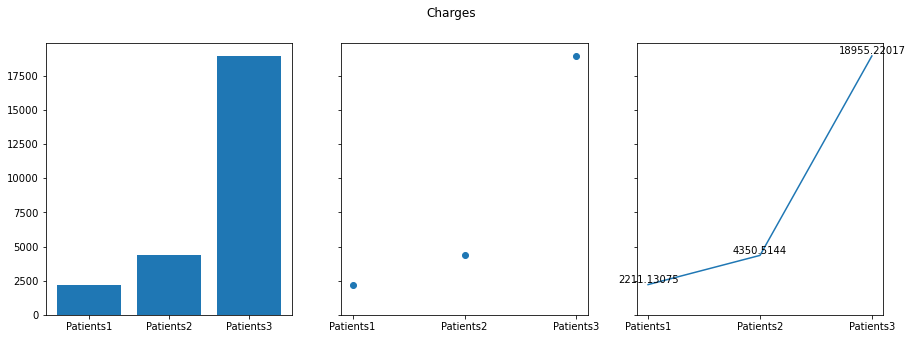

In [95]:
# First we will create an empty list
same_factors_patients = []
# now i will iterate thrugh every index in all_info_per_patient list
for i in all_info_per_patient:
    # create an if statemant that wi takes only males at the age of 18, bmi between 22 to 24 (it should not affect the charge), non smokers, eothout children form the northeast
    if i[0] == 18 and i[1] == 1 and i[2] <= 24 and i[2] >= 22 and i[3] == 0 and i[4] == 0 and i[5] == "northeast":
        # if so it will append to same_factors_patients only the charges
        same_factors_patients.append(i)

# Saving the patients chrages in variables       
patients1 = same_factors_patients[0][-1]
patients2 = same_factors_patients[1][-1]
patients3 = same_factors_patients[2][-1]

# Saving how manny patients there is in the same_factors_patients list
num_of_same_factors_patients = len(same_factors_patients)

data = {'Patients1': patients1, 'Patients2': patients2, 'Patients3': patients3}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Charges')
for i in range(len(values)):
    plt.text(i, values[i], values[i], ha="center", va="bottom")




There is a huge differences between the charges although the patients have the same factors.
We can tell from the result that there is some factor that effect the insurance charge that the data dose not include.

# Conclusion
From all of the analysis we can tell three things:
1. The smoker factor is the major factor that affect on the price of chrage
2. In average female yearly charges are more expensive than males
3. There is some factors that affect the price that are not insude the data, if we want to ge more accurate result an analysis, we wiil need to have much more data and much more information.